In [1]:
import time

import networkx as nx
import pandas as pd

from P10.louvian import louvain, visualize_partition_clustered, flatten_partitions, save_node2comm_to_csv

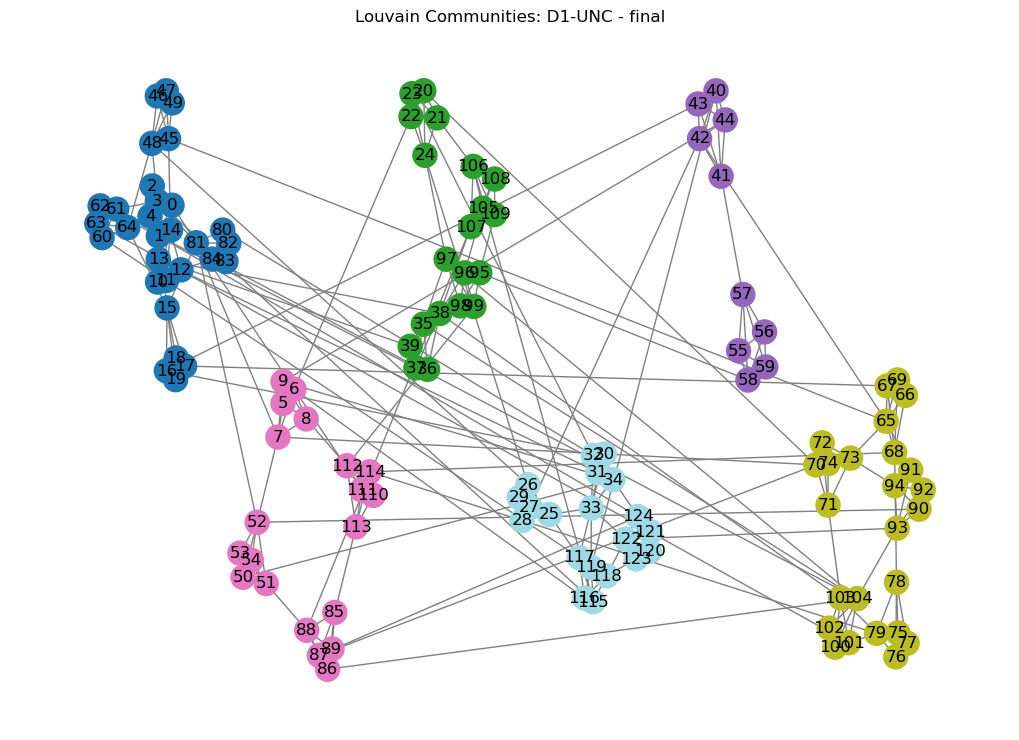

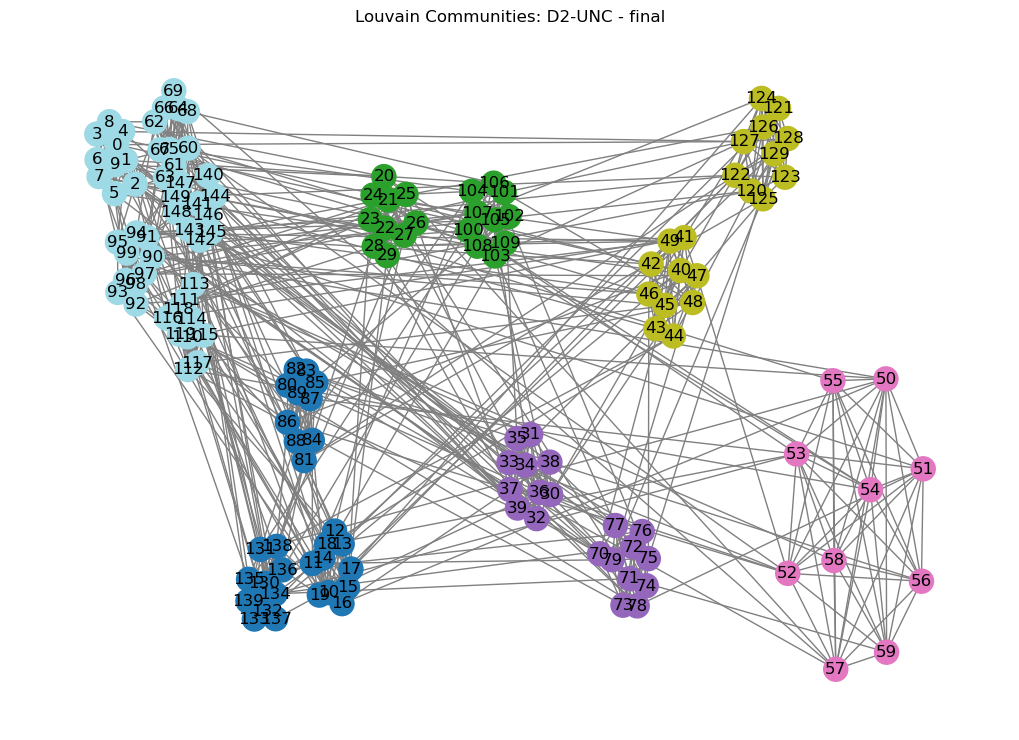

In [2]:
files = ["D1-UNC", "D2-UNC"]
for file in files:
    df = pd.read_csv(f"competition/{file}.csv", header=None)
    A = df.values
    G = nx.from_numpy_array(A)

    start = time.perf_counter()
    level_partitions = louvain(G)
    end = time.perf_counter()

    final_partition = flatten_partitions(level_partitions)
    # print(len(final_partition[0]))
    node2comm = {node: comms[-1] for node, comms in final_partition.items()}
    visualize_partition_clustered(G, node2comm, title=f"{file} - final")

    with open("description.txt", "a", encoding="utf-8") as f:
        f.write(f"{file}.csv,{end-start:.4f}\n")

    save_node2comm_to_csv(node2comm, f"{file}.csv")

based on louvain pseudocode form paper:
Traag, V. A., et al. “From Louvain to Leiden: Guaranteeing Well-Connected Communities.” Scientific Reports, vol. 9, no. 1, Mar. 2019. Crossref, https://doi.org/10.1038/s41598-019-41695-z.